In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [5]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [6]:
df["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [7]:
df[df.duplicated()]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region


# Analysis the data

In [8]:
dataframe=df.reset_index()
dataframe

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [10]:
data=df[['WHO Region', 'Confirmed']]
data

,WHO Region,Confirmed
0,Eastern Mediterranean,36263
1,Europe,4880
2,Africa,27973
3,Europe,907
4,Africa,950
...,...,...
182,Eastern Mediterranean,10621
183,Africa,10
184,Eastern Mediterranean,1691
185,Africa,4552


In [11]:
dataframe1 =df[['Country/Region','Confirmed','Deaths','Recovered','Active']].groupby('Country/Region').mean().round(2).sort_values(by='Confirmed',ascending =False)

dataframe1 = dataframe1.reset_index().head(10)
dataframe1

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,4290259.0,148011.0,1325804.0,2816444.0
1,Brazil,2442375.0,87618.0,1846641.0,508116.0
2,India,1480073.0,33408.0,951166.0,495499.0
3,Russia,816680.0,13334.0,602249.0,201097.0
4,South Africa,452529.0,7067.0,274925.0,170537.0
5,Mexico,395489.0,44022.0,303810.0,47657.0
6,Peru,389717.0,18418.0,272547.0,98752.0
7,Chile,347923.0,9187.0,319954.0,18782.0
8,United Kingdom,301708.0,45844.0,1437.0,254427.0
9,Iran,293606.0,15912.0,255144.0,22550.0


# ploting graph

([<matplotlib.patches.Wedge at 0x229eef03c70>,
 [Text(0.3962314927659173, 1.0261581769593286, ''),
  Text(-1.0984823651391695, 0.0577623880934343, ''),
  Text(-0.5504815338749552, -0.9523497681328414, ''),
  Text(0.13117898061517125, -1.0921502071806628, ''),
  Text(0.5032888933282144, -0.9781105713836558, ''),
  Text(0.7194084449739304, -0.8321367010895455, ''),
  Text(0.8836960345834441, -0.6550429897812025, ''),
  Text(0.9993280598686171, -0.4597210336271617, ''),
  Text(1.0660451970158118, -0.2711966775598832, ''),
  Text(1.0962785966985245, -0.09040596451957279, '')],
 [Text(0.28816835837521254, 0.7462968559704208, '38.27%'),
  Text(-0.7988962655557597, 0.04200900952249767, '21.79%'),
  Text(-0.40035020645451286, -0.692618013187521, '13.20%'),
  Text(0.09540289499285182, -0.7942910597677547, '7.29%'),
  Text(0.36602828605688315, -0.7113531428244769, '4.04%'),
  Text(0.5232061417992221, -0.605190328065124, '3.53%'),
  Text(0.6426880251515957, -0.4763949016590563, '3.48%'),
  Text(0

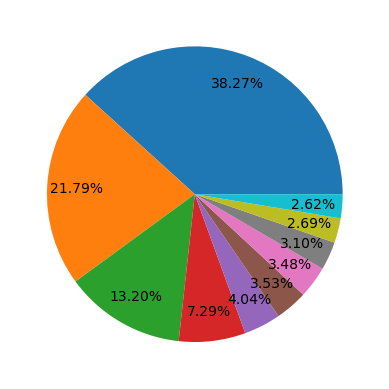

In [13]:
plt.pie(dataframe1['Confirmed'], autopct="%0.2f%%",pctdistance=0.8)

In [ ]:
#Top 10 Country with Active Cases

([<matplotlib.patches.Wedge at 0x229f0afe650>,
 [Text(-0.365437849810526, 1.0375235794553586, 'US'),
  Text(-0.5740246409509211, -0.9383473299270192, 'Brazil'),
  Text(0.14413318161141703, -1.0905162199429088, 'India'),
  Text(0.6244392194436217, -0.9055802897703995, 'Russia'),
  Text(0.8304825467718822, -0.7213173639302528, 'South Africa'),
  Text(0.9277266659240166, -0.5910357293205785, 'Mexico'),
  Text(0.9817301413606444, -0.4961914242951095, 'Peru'),
  Text(1.0181116541618218, -0.41647167930110074, 'Chile'),
  Text(1.0773975299062803, -0.2218435542265002, 'United Kingdom'),
  Text(1.0998714514387302, -0.01681637029982902, 'Iran')],
 [Text(-0.26577298168038255, 0.7545626032402607, '60.78%'),
  Text(-0.41747246614612443, -0.6824344217651048, '10.97%'),
  Text(0.10482413208103057, -0.7931027054130245, '10.69%'),
  Text(0.45413761414081577, -0.658603847105745, '4.34%'),
  Text(0.603987306743187, -0.5245944464947293, '3.68%'),
  Text(0.6747103024901939, -0.42984416677860254, '1.03%'),


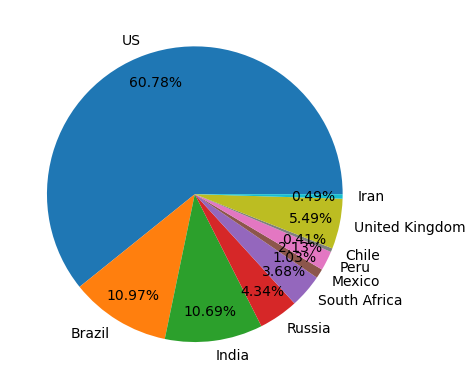

In [17]:
plt.pie(dataframe1['Active'], labels=dataframe1['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

In [ ]:
#

In [29]:
dataframe2 = df[['Country/Region','New cases','New deaths','New recovered']].groupby('Country/Region').mean().round(2).sort_values(by='New cases',ascending=False)

dataframe2

,New cases,New deaths,New recovered
Country/Region,,,
US,56336.0,1076.0,27941.0
India,44457.0,637.0,33598.0
Brazil,23284.0,614.0,33728.0
Colombia,16306.0,508.0,11494.0
Peru,13756.0,575.0,4697.0
...,...,...,...
Spain,0.0,0.0,0.0
Equatorial Guinea,0.0,0.0,0.0
Liechtenstein,0.0,0.0,0.0


In [30]:
dataframe2 = dataframe2.reset_index()[0:10]
dataframe2

,Country/Region,New cases,New deaths,New recovered
0,US,56336.0,1076.0,27941.0
1,India,44457.0,637.0,33598.0
2,Brazil,23284.0,614.0,33728.0
3,Colombia,16306.0,508.0,11494.0
4,Peru,13756.0,575.0,4697.0
5,South Africa,7096.0,298.0,9848.0
6,Russia,5607.0,85.0,3077.0
7,Mexico,4973.0,342.0,8588.0
8,Argentina,4890.0,120.0,2057.0
9,Bangladesh,2772.0,37.0,1801.0


In [ ]:
#Top 10 Country with New Cases

<Axes: xlabel='New cases', ylabel='Country/Region'>

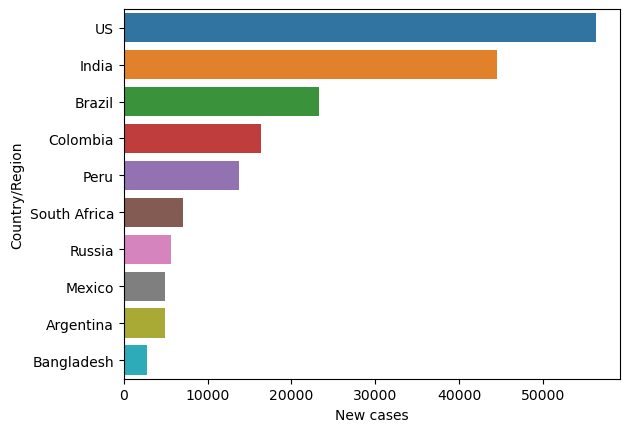

In [31]:
sns.barplot(y='Country/Region',x='New cases',data=dataframe2)

In [32]:
#Top 10 Country with Affected new cases

<Axes: xlabel='New deaths', ylabel='Country/Region'>

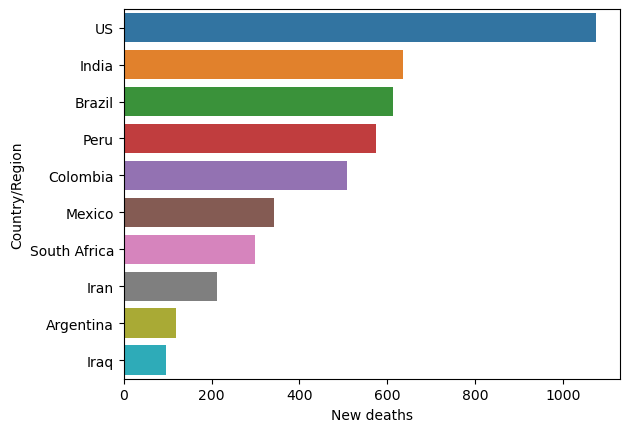

In [33]:
dataframe2 = df[['Country/Region','New deaths']].sort_values(by='New deaths',ascending=False)[0:10]


sns.barplot(y='Country/Region',x='New deaths',data=dataframe2)